# Important Packages:

In [1]:
import nltk
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import urllib
from nltk.corpus import PlaintextCorpusReader
import pandas as pd
import urllib.request
import string
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.metrics import silhouette_samples,silhouette_score
from array import *
from nltk.probability import FreqDist
import squarify
from itertools import chain
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random
import pickle
from yellowbrick.cluster import KElbowVisualizer
import pysentiment2 as ps
from nrclex import NRCLex
from nltk.corpus import sentiwordnet as swn
from nltk import pos_tag
from nltk import map_tag
import ssl
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import seaborn as sns
import itertools

# URL Collection:

In [2]:
fomc_url = ['https://www.federalreserve.gov/newsevents/pressreleases/monetary20190130a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20190320a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20190501a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20190619a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20190731a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20190918a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20191011a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20191030a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20191211a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200129a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200303a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200315a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200323a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200429a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200610a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200729a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20200916a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20201105a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20201216a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210127a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210317a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210428a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210616a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210728a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20210922a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20211103a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20211215a.htm',
           'https://www.federalreserve.gov/newsevents/pressreleases/monetary20220126a.htm']

# Dataframe Initialization:

In [3]:
fomc = pd.DataFrame()
fomc['urls'] = fomc_url
fomc['content'] = "will be filled"

# FOMC Scraping (April 2019 - till date):

In [4]:
content=[]
for i in range(0,len(fomc_url),1):
    weburl  = urllib.request.urlopen(fomc_url[i])
    htmlparse = BeautifulSoup(weburl.read(), 'html.parser')
    for para in htmlparse.find_all("p"):
        raw = para.get_text()
        content.append(raw)
    fomc.at[i,"content"] = content
    content = []

# Date Extraction:

In [5]:
fomc['date'] = "will be filled"
for i in range(0,len(fomc),1):
    fomc.loc[i,'date'] = fomc['content'][i][37]

# Relevant Content Extraction:

In [6]:
fomc['updated_content'] = "will be filled"
for i in range(0,len(fomc),1):
    fomc.at[i,'updated_content'] = fomc["content"][i][39:len(content)-4:1]

# Content Cleaning:

In [7]:
def clean(text):
    
    text_clean = ''.join(text)
    # text_clean = text
    text_clean = text_clean.replace('\xa0', ' ')
    text_clean = text_clean.replace('\r', ' ')
    text_clean = text_clean.replace('\n', ' ')
    return text_clean

fomc['content_clean'] = fomc['updated_content'].apply(lambda x: clean(x))

fomc.head(2)

,urls,content,date,updated_content,content_clean
0,https://www.federalreserve.gov/newsevents/pres...,"[The Federal Reserve, the central bank of the ...","January 30, 2019",[Information received since the Federal Open M...,Information received since the Federal Open Ma...
1,https://www.federalreserve.gov/newsevents/pres...,"[The Federal Reserve, the central bank of the ...","March 20, 2019",[Information received since the Federal Open M...,Information received since the Federal Open Ma...


# Punctuation Cleaning:

In [8]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

fomc['content_clean'] = fomc['content_clean'].apply(lambda x: remove_punct(x))

fomc.head(2)

,urls,content,date,updated_content,content_clean
0,https://www.federalreserve.gov/newsevents/pres...,"[The Federal Reserve, the central bank of the ...","January 30, 2019",[Information received since the Federal Open M...,Information received since the Federal Open Ma...
1,https://www.federalreserve.gov/newsevents/pres...,"[The Federal Reserve, the central bank of the ...","March 20, 2019",[Information received since the Federal Open M...,Information received since the Federal Open Ma...


# Tokenization:

In [9]:
fomc['content_tokenized'] = fomc['content_clean'].apply(lambda x: nltk.word_tokenize(x.lower()))
fomc.head(2)

,urls,content,date,updated_content,content_clean,content_tokenized
0,https://www.federalreserve.gov/newsevents/pres...,"[The Federal Reserve, the central bank of the ...","January 30, 2019",[Information received since the Federal Open M...,Information received since the Federal Open Ma...,"[information, received, since, the, federal, o..."
1,https://www.federalreserve.gov/newsevents/pres...,"[The Federal Reserve, the central bank of the ...","March 20, 2019",[Information received since the Federal Open M...,Information received since the Federal Open Ma...,"[information, received, since, the, federal, o..."


# Stopwords Cleaning:

In [10]:
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

fomc['content_nostop'] = fomc['content_tokenized'].apply(lambda x: remove_stopwords(x))

fomc.head(2)

,urls,content,date,updated_content,content_clean,content_tokenized,content_nostop
0,https://www.federalreserve.gov/newsevents/pres...,"[The Federal Reserve, the central bank of the ...","January 30, 2019",[Information received since the Federal Open M...,Information received since the Federal Open Ma...,"[information, received, since, the, federal, o...","[information, received, since, federal, open, ..."
1,https://www.federalreserve.gov/newsevents/pres...,"[The Federal Reserve, the central bank of the ...","March 20, 2019",[Information received since the Federal Open M...,Information received since the Federal Open Ma...,"[information, received, since, the, federal, o...","[information, received, since, federal, open, ..."


# Lemmatization:

In [11]:
wn = nltk.WordNetLemmatizer()
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

fomc['content_lemmatized'] = fomc['content_nostop'].apply(lambda x: lemmatizing(x))

fomc.head(2)

,urls,content,date,updated_content,content_clean,content_tokenized,content_nostop,content_lemmatized
0,https://www.federalreserve.gov/newsevents/pres...,"[The Federal Reserve, the central bank of the ...","January 30, 2019",[Information received since the Federal Open M...,Information received since the Federal Open Ma...,"[information, received, since, the, federal, o...","[information, received, since, federal, open, ...","[information, received, since, federal, open, ..."
1,https://www.federalreserve.gov/newsevents/pres...,"[The Federal Reserve, the central bank of the ...","March 20, 2019",[Information received since the Federal Open M...,Information received since the Federal Open Ma...,"[information, received, since, the, federal, o...","[information, received, since, federal, open, ...","[information, received, since, federal, open, ..."


# Content W/O Number:

In [12]:
fomc['w/o_num'] = "will be filled"
wolist = []
for i in range(0,len(fomc),1) :
    
    for j in range(0,len(fomc['content_nostop'][i]),1) :
        
        text = fomc['content_nostop'][i][j]
        run = re.sub('[0-9]+', '', text)
        wolist.append(run)
    
    fomc.at[i,"w/o_num"] = wolist
    wolist=[]

fomc.head(2)

,urls,content,date,updated_content,content_clean,content_tokenized,content_nostop,content_lemmatized,w/o_num
0,https://www.federalreserve.gov/newsevents/pres...,"[The Federal Reserve, the central bank of the ...","January 30, 2019",[Information received since the Federal Open M...,Information received since the Federal Open Ma...,"[information, received, since, the, federal, o...","[information, received, since, federal, open, ...","[information, received, since, federal, open, ...","[information, received, since, federal, open, ..."
1,https://www.federalreserve.gov/newsevents/pres...,"[The Federal Reserve, the central bank of the ...","March 20, 2019",[Information received since the Federal Open M...,Information received since the Federal Open Ma...,"[information, received, since, the, federal, o...","[information, received, since, federal, open, ...","[information, received, since, federal, open, ...","[information, received, since, federal, open, ..."


In [13]:
fomc['w/o_num_lemm'] = "will be filled"
wolist = []
for i in range(0,len(fomc),1) :
    
    for j in range(0,len(fomc['content_lemmatized'][i]),1) :
        
        text = fomc['content_lemmatized'][i][j]
        run = re.sub('[0-9]+', '', text)
        wolist.append(run)
    
    fomc.at[i,"w/o_num_lemm"] = wolist
    wolist=[]

fomc.head(2)

,urls,content,date,updated_content,content_clean,content_tokenized,content_nostop,content_lemmatized,w/o_num,w/o_num_lemm
0,https://www.federalreserve.gov/newsevents/pres...,"[The Federal Reserve, the central bank of the ...","January 30, 2019",[Information received since the Federal Open M...,Information received since the Federal Open Ma...,"[information, received, since, the, federal, o...","[information, received, since, federal, open, ...","[information, received, since, federal, open, ...","[information, received, since, federal, open, ...","[information, received, since, federal, open, ..."
1,https://www.federalreserve.gov/newsevents/pres...,"[The Federal Reserve, the central bank of the ...","March 20, 2019",[Information received since the Federal Open M...,Information received since the Federal Open Ma...,"[information, received, since, the, federal, o...","[information, received, since, federal, open, ...","[information, received, since, federal, open, ...","[information, received, since, federal, open, ...","[information, received, since, federal, open, ..."


# Removing words having length less than 3:

In [14]:
def short_remove(x):
    
    sh_list = []

    for j in range(0,len(fomc),1) :
    
        for i in range(0,len(fomc[x][j])) :
        
            if len(fomc[x][j][i]) > 2:
            
                main = fomc[x][j][i]
                sh_list.append(main)
    
        fomc.at[j,x] = sh_list
        sh_list=[]

In [15]:
short_remove('content_nostop')
short_remove('content_lemmatized')
short_remove('w/o_num')
short_remove('w/o_num_lemm')

# Covid Lexicon:

In [29]:
c_lex = ['epidemic','coronavirus','outbreak','corona','pandemic','virus','contagious','wuhan','covid','strain','outbreaks','communicable',
         'quarantines','epidemics','pandemics','infectious','respiratory','distancing','infected','pathogenic','quarantine','viral',
         'antiviral','infection','infections','vaccine','cov','shutdowns','strains','vaccines','vaccination','viruses','mrna','transmitted','covid19']

# Relative Frequency Calculator for individual words:

In [30]:
fomc.columns

Index(['urls', 'content', 'date', 'updated_content', 'content_clean',
       'content_tokenized', 'content_nostop', 'content_lemmatized', 'w/o_num',
       'w/o_num_lemm'],
      dtype='object')

In [36]:
table_wo_num = fomc[['date','w/o_num']]
sumh = 0

for word in c_lex :
    
    table_wo_num[word] = "will be filled"
    
    for j in range(0,len(fomc),1) :
        
        for i in range(0,len(fomc['w/o_num'][j])) :
        
            if fomc['w/o_num'][j][i] == word :
            
                sumh = sumh + 1
    
        relfreq = sumh/len(fomc['w/o_num'][j])
        table_wo_num.loc[j,word] = relfreq
        sumh =  0

<ipython-input-36-e8665a7ba53d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_wo_num[word] = "will be filled"
C:\Users\Arijit\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


# Total Frequency:

In [42]:
table_wo_num["TotalRelFrequency"] = "will be filled"
for i in range(0,len(table_wo_num),1):
    a = table_wo_num.loc[i,c_lex]
    sumh = a[0]
    for j in range(1,35,1):
        sumh = sumh + a[j]
    table_wo_num.loc[i,"TotalRelFrequency"] = sumh
    sumh = 0

In [49]:
table_wo_num["TotalCovidWords"] = "will be filled"
for i in range(0,len(table_wo_num),1):
    table_wo_num.loc[i,"TotalCovidWords"] = len(fomc['w/o_num'][i]) * table_wo_num.iloc[i,37]

In [64]:
table_wo_num.insert(1, 'Date', "will be filled")

In [65]:
for i in range(0,len(table_wo_num),1):
    table_wo_num.loc[i,"Date"] = table_wo_num['date'][i][2:5:]+str(",")+table_wo_num['date'][i][10:14:]

In [53]:
table_wo_num["TotalWords"] = "will be filled"

In [54]:
for i in range(0,len(table_wo_num),1):
    table_wo_num.loc[i,"TotalWords"] = len(fomc['w/o_num'][i])

In [56]:
table_wo_num.index = pd.to_datetime(table_wo_num['date'])

# Frequency Plot:

C:\Users\Arijit\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Arijit\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
C:\Users\Arijit\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.py

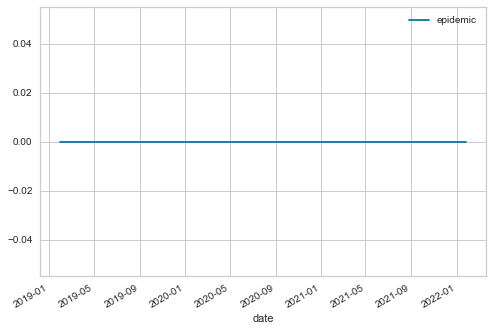

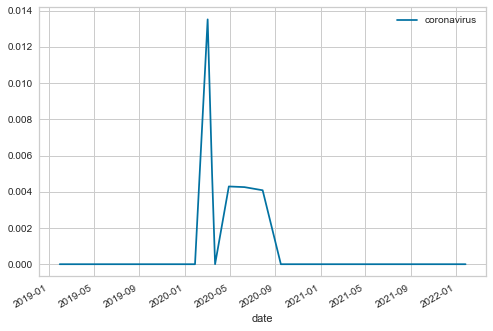

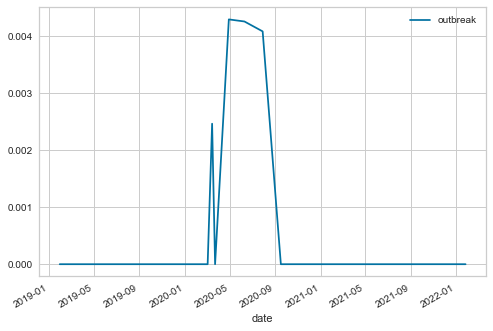

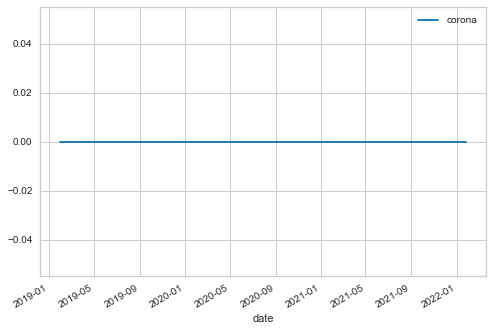

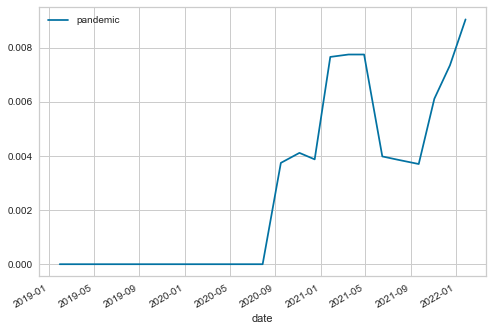

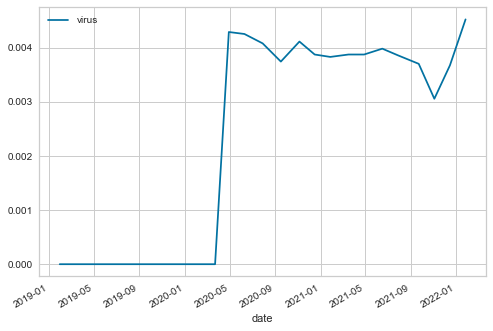

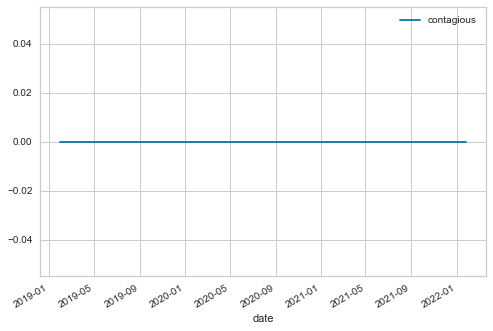

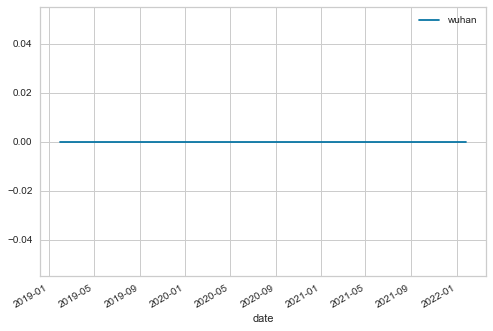

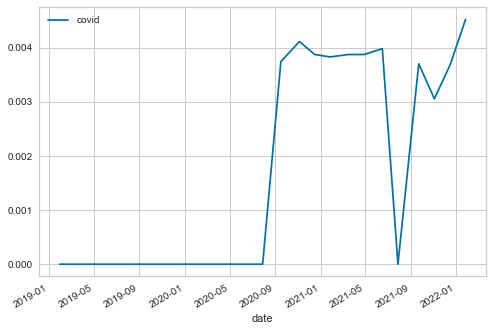

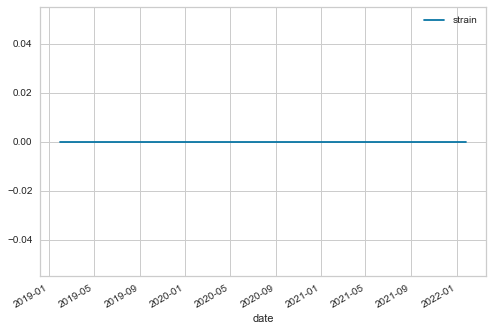

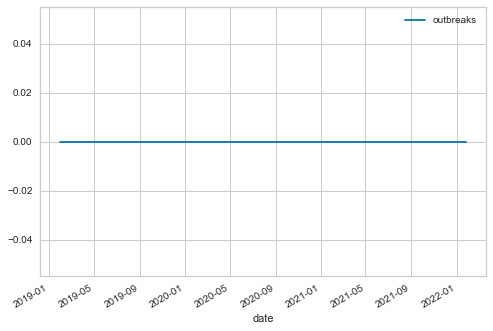

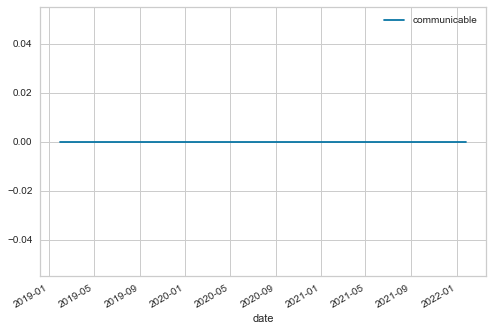

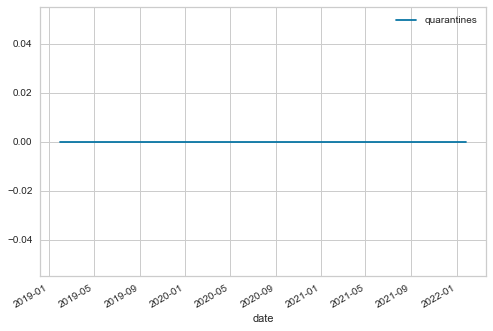

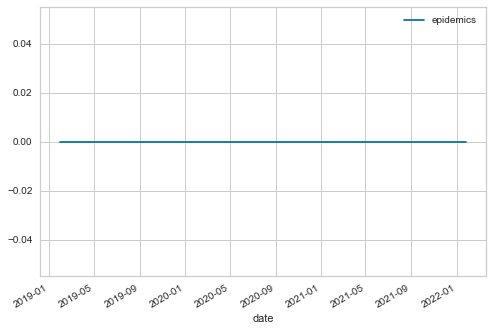

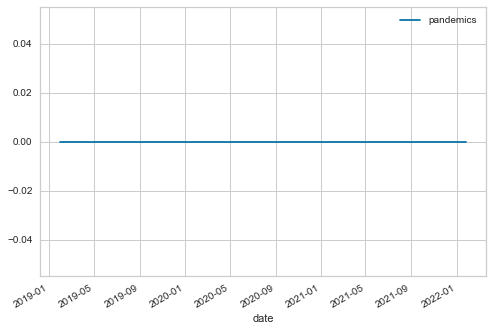

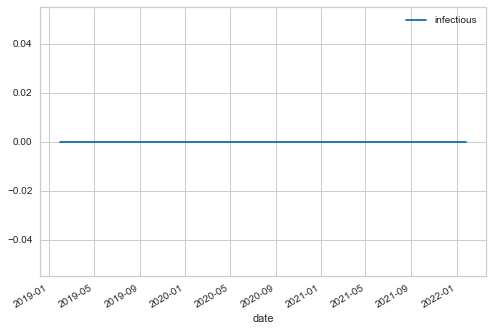

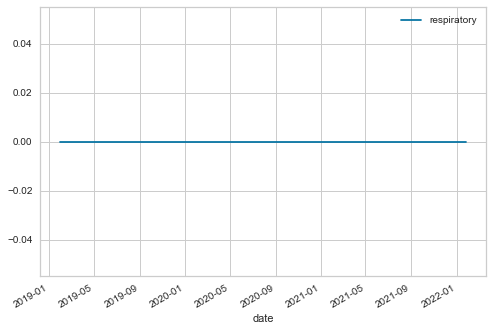

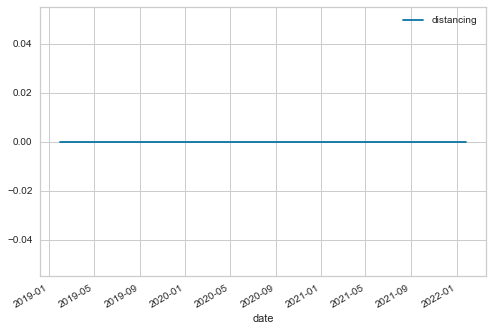

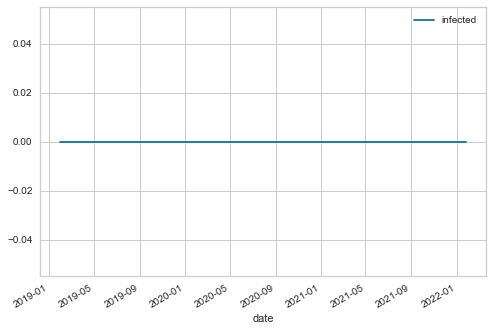

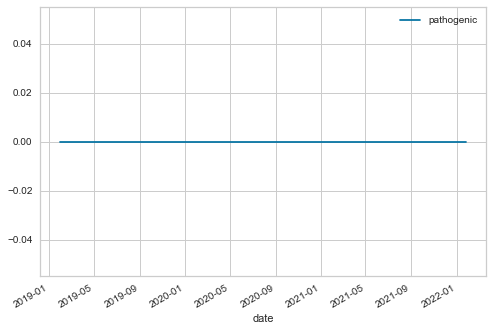

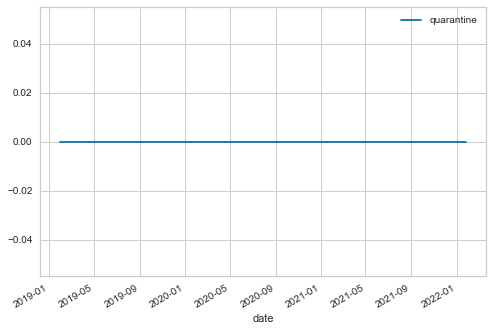

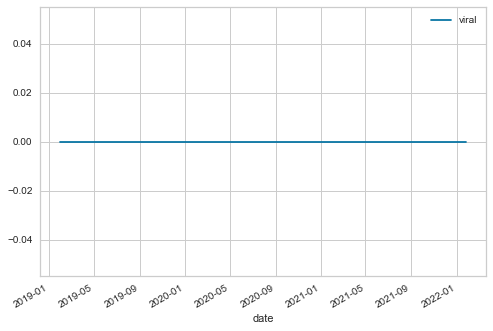

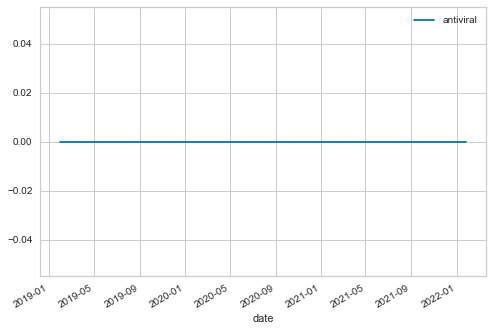

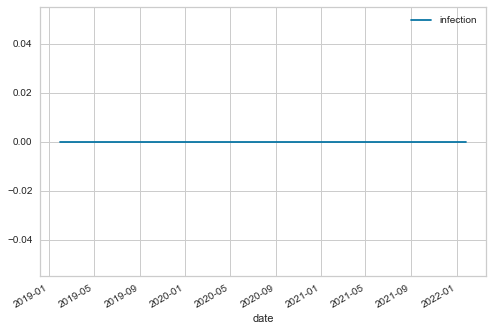

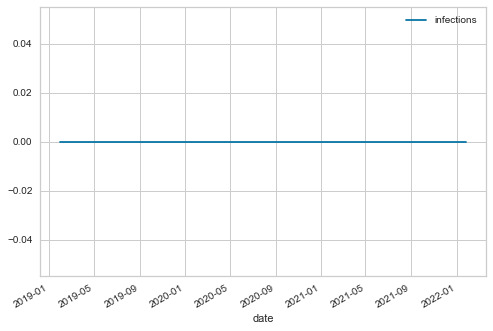

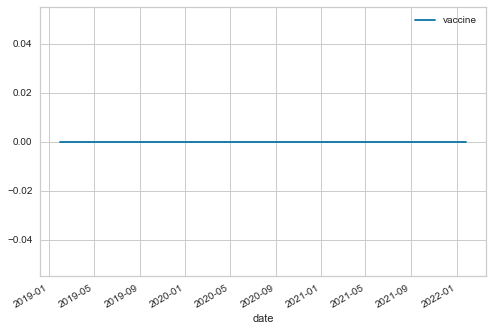

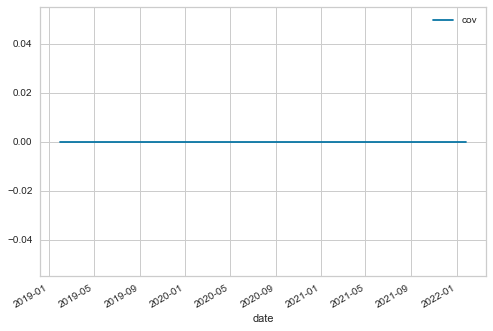

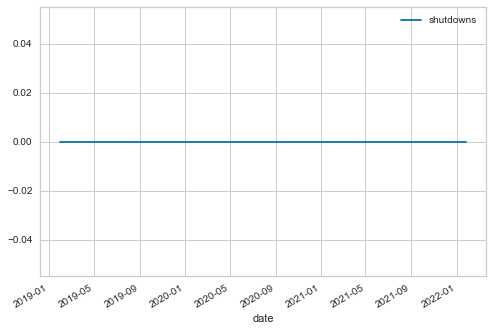

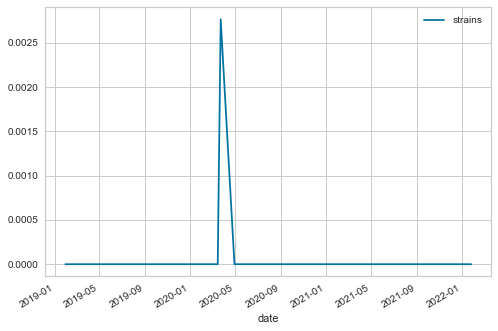

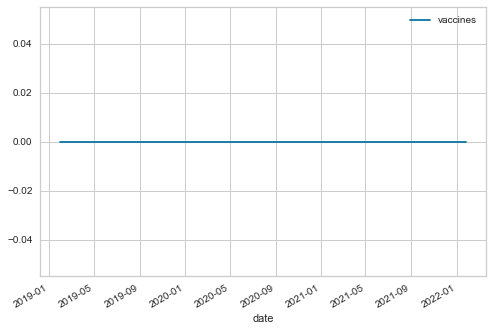

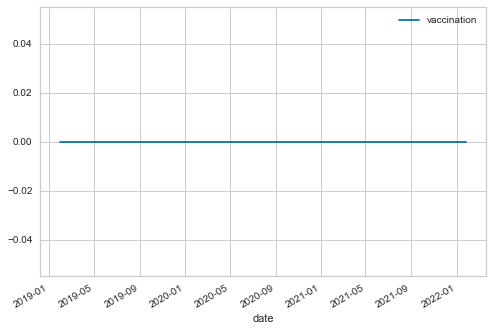

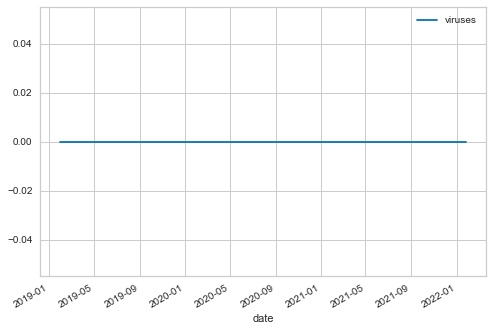

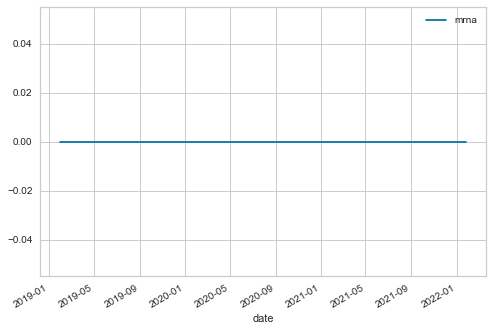

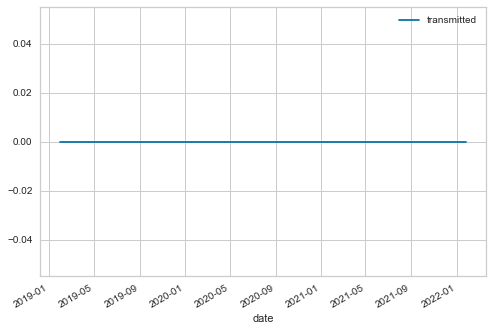

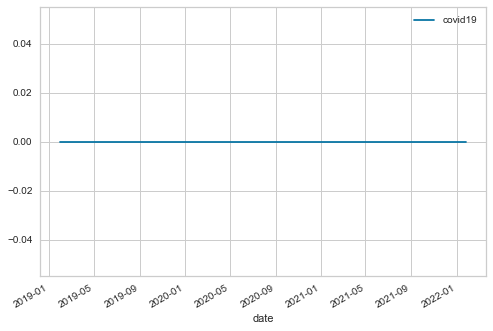

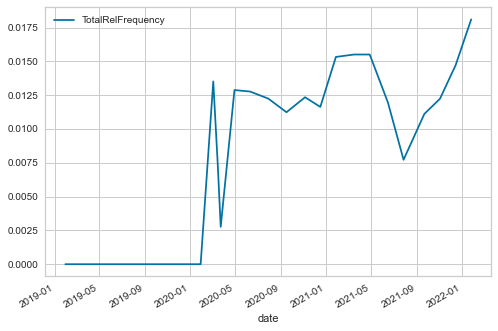

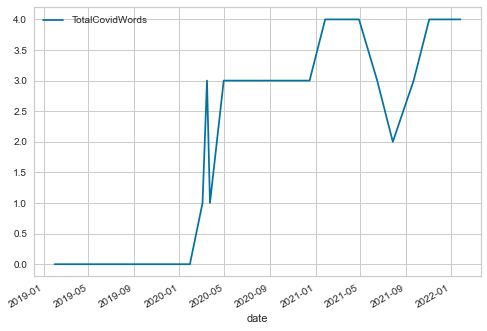

In [59]:
for i in range(2,39,1):
    table_wo_num[table_wo_num.columns[[i]]].plot(kind='line')

# Sentiment Score

In [100]:
score_speeches = fomc[['date','content_clean','content_tokenized','w/o_num_lemm']]

# Loughran_Polarity

In [101]:
score_speeches['Loughran_Polarity'] = "will be filled"
lm = ps.LM()

for i in range(0,len(score_speeches),1):
    tokens = lm.tokenize(score_speeches['content_clean'][i].lower())
    score = lm.get_score(tokens)
    score_speeches.loc[i,'Loughran_Polarity'] = score.get('Polarity')

<ipython-input-101-b1c7dc01b4bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_speeches['Loughran_Polarity'] = "will be filled"
C:\Users\Arijit\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


# Loughran_Subjectivity

In [102]:
score_speeches['Loughran_Subjectivity'] = "will be filled"
lm = ps.LM()

for i in range(0,len(score_speeches),1):
    tokens = lm.tokenize(score_speeches['content_clean'][i].lower())
    score = lm.get_score(tokens)
    score_speeches.loc[i,'Loughran_Subjectivity'] = score.get("Subjectivity")

<ipython-input-102-eb52bee319fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_speeches['Loughran_Subjectivity'] = "will be filled"


# NRC_Polarity

In [103]:
score_speeches['NRC_Polarity'] = "will be filled"
p1 = 0
n1 = 0

for i in range(0,len(score_speeches),1):
    
    for j in range(0,len(score_speeches['w/o_num_lemm'][i]),1):
        
        score = NRCLex(score_speeches['w/o_num_lemm'][i][j]).raw_emotion_scores
        
        p = score.get("positive")
        # print('pos :',p)
        if p == 1 :
            p1 = p1 + 1
        else :
            p1 = p1
        
        n = score.get("negative")
        # print('neg :',n)
        if n == 1 :
            n1 = n1 + 1
        else :
            n1 = n1
            
    if (p1 + n1) == 0 :
        score_speeches.loc[i,'NRC_Polarity'] = "Null"
        
    else :
        score_speeches.loc[i,'NRC_Polarity'] = (p1 - n1)/(p1 + n1)
    p1 = 0
    n1 = 0        

<ipython-input-103-33e0ce217925>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_speeches['NRC_Polarity'] = "will be filled"


# Financial Stability Score

In [104]:
finstab = pd.read_excel('E:/NLP_PROJECT/Finstab.xlsx')

In [105]:
finstab_set_pos = {word for word in finstab.loc[finstab['Positive'] == 1]['Word']}

In [106]:
finstab_set_neg = {word for word in finstab.loc[finstab['Negative'] == 1]['Word']}

In [107]:
score_speeches['Financial_Stab_Score'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_speeches),1):
    
    for j in range(0,len(score_speeches['w/o_num_lemm'][i]),1):
        
        set_word = {word for word in score_speeches['w/o_num_lemm'][i]}
        pos_set = finstab_set_pos.intersection(set_word)
        neg_set = finstab_set_neg.intersection(set_word)
        p = len(pos_set)
        n = len(neg_set)
      
    if (p + n) == 0 :
        score_speeches.loc[i,'Financial_Stab_Score'] = "Null"
        
    else :
        score_speeches.loc[i,'Financial_Stab_Score'] = (p - n)/(p + n)
    # print("Row No:",i)

<ipython-input-107-6ddbeff334c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_speeches['Financial_Stab_Score'] = "will be filled"


# Sentiword Score

In [108]:
score_speeches['Sentiword_Score'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_speeches),1):
    text = score_speeches['w/o_num_lemm'][i]
    tagged_sent = pos_tag(text)
    store_it = [(word, map_tag('en-ptb', 'universal', tag)) for word, tag in tagged_sent]
    
    for word,tag in store_it:
        
        if(tag=='NOUN'):
            tag='n'
        elif(tag=='VERB'):
            tag='v'
        elif(tag=='ADJ'):
            tag='a'
        elif(tag=='ADV'):
            tag ='r'
        else:
            tag='nothing'
    
        concat = word+'.'+tag+'.01'
    
        try:
            p1 = swn.senti_synset(concat).pos_score()
            n1 = swn.senti_synset(concat).neg_score()
        except:
            print('Null')
            
        p = p + p1
        n = n + n1
    
    if (p + n) == 0 :
        score_speeches.loc[i,'Sentiword_Score'] = "Null"
        
    else :
        score_speeches.loc[i,'Sentiword_Score'] = ((p - n)/(p + n))
    p = 0
    n = 0

<ipython-input-108-263a6d5507ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  score_speeches['Sentiword_Score'] = "will be filled"


Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null
Null


# Hu & Liu Score

In [109]:
huliu = pd.read_csv('E:/NLP_PROJECT/huliu.csv')

In [110]:
huliu_set_pos = {word for word in huliu.loc[huliu['y'] == 1]['x']}

In [111]:
huliu_set_neg = {word for word in huliu.loc[huliu['y'] == -1]['x']}

In [112]:
score_speeches['Hu & Liu Polarity'] = "will be filled"
p = 0
n = 0

for i in range(0,len(score_speeches),1):
    
    for j in range(0,len(score_speeches['w/o_num_lemm'][i]),1):
        
        set_word = {word for word in score_speeches['w/o_num_lemm'][i]}
        pos_set = huliu_set_pos.intersection(set_word)
        neg_set = huliu_set_neg.intersection(set_word)
        p = len(pos_set)
        n = len(neg_set)
    if (p + n) == 0 :
        score_speeches.loc[i,'Hu & Liu Polarity'] = "Null"
        
    else :
        score_speeches.loc[i,'Hu & Liu Polarity'] = (p - n)/(p + n)
    # print("Row No:",i)

# Loughran Uncertainty

In [113]:
loughran = pd.read_csv('E:/NLP_PROJECT/loughran.csv')

In [114]:
loughran_word = {word for word in loughran['word']}

In [115]:
score_speeches['Loughran_Uncertainty'] = "will be filled"
p = 0

for i in range(0,len(score_speeches),1):
    for j in range(0,len(score_speeches['w/o_num_lemm'][i]),1):
        set_word = {word for word in score_speeches['w/o_num_lemm'][i]}
        set_total = loughran_word.intersection(set_word)
        p = len(set_total)
    
    score_speeches.loc[i,'Loughran_Uncertainty'] = (p)/(len(score_speeches['w/o_num_lemm'][i]))
    # print("Row No:",i)    

In [116]:
score_col = [0] + [i for i in range(4,11,1)]

In [117]:
score_speeches.index = pd.to_datetime(score_speeches['date'])

In [118]:
score_speeches['Financial_Stab_Score'][10] = 0

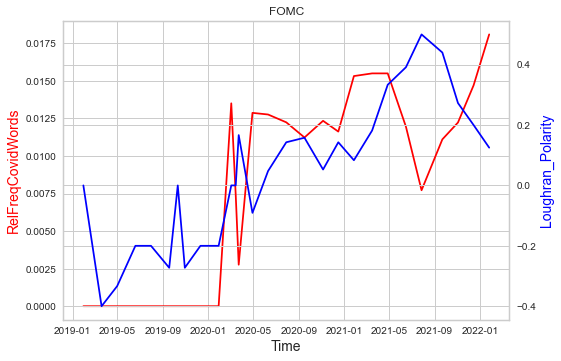

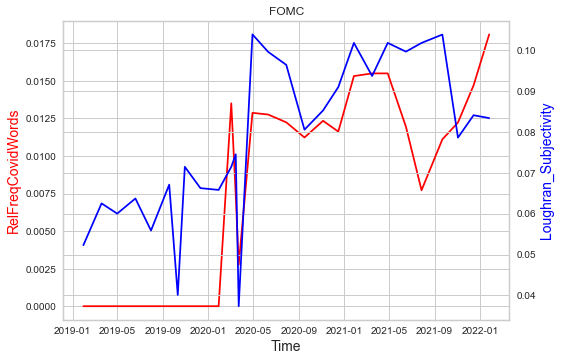

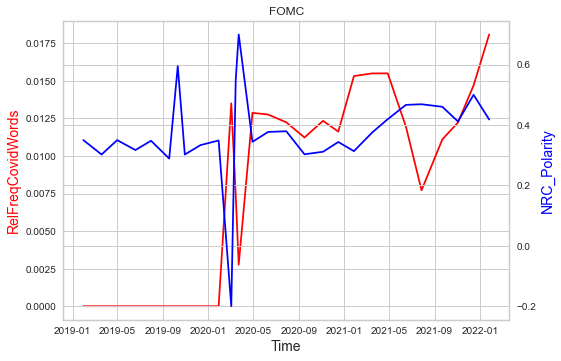

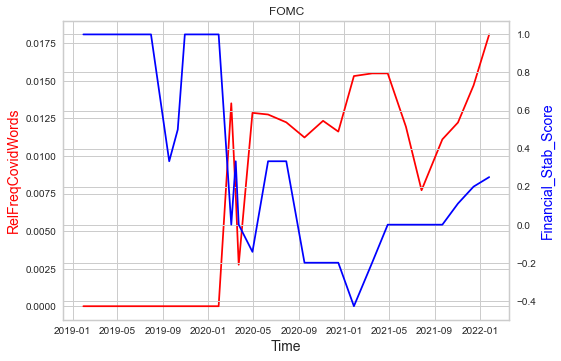

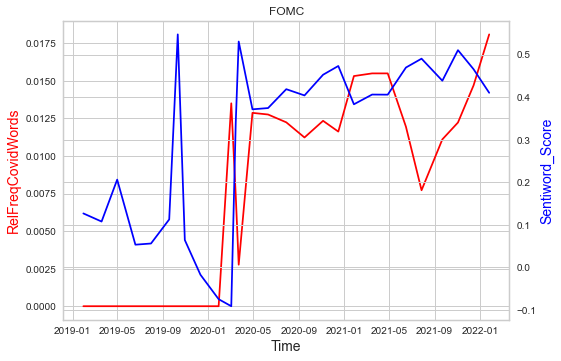

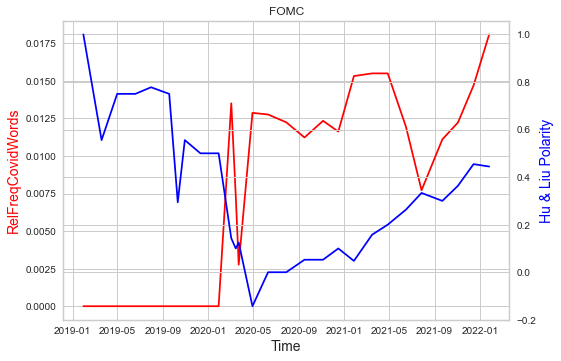

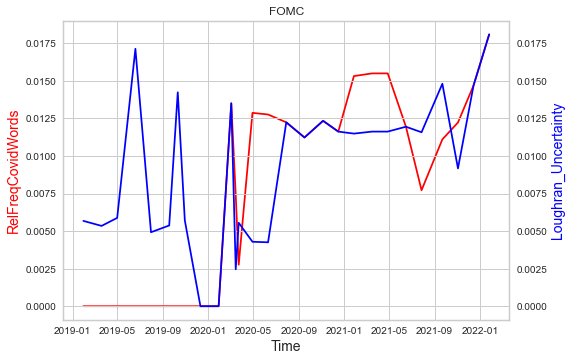

In [119]:
for i in range(4,11,1) :
    # create figure and axis objects with subplots()
    fig,ax = plt.subplots()
    # make a plot
    ax.plot(table_wo_num.TotalRelFrequency, color="red")
    # set x-axis label
    ax.set_xlabel("Time",fontsize=14)
    # set y-axis label
    ax.set_ylabel("RelFreqCovidWords",color="red",fontsize=14)
    ax2=ax.twinx()
    # make a plot with different y-axis using second axis object
    ax2.plot(score_speeches[score_speeches.columns[[i]]],color="blue")
    ax2.set_ylabel(score_speeches.columns[i],color="blue",fontsize=14)
    plt.title('FOMC')
    a = score_speeches.columns[i]+".jpg"
    plt.savefig(a)
    plt.show()

In [120]:
score_speeches[score_speeches.columns[score_col]].to_csv('score_speeches.csv')